# Variables Aleatorias Continuas - Clase 8 de Septiembre

## Ejercicio 2: Función de Distribución Acumulada

Basado en el material de la Unidad 3 - Variables Aleatorias Continuas

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import sympy
from fractions import Fraction
from IPython.display import display, Math
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon, norm

## Ejemplo 2: Función de Distribución Acumulada

Sea una variable aleatoria X con función de densidad:

$$f(x) = \begin{cases}
\frac{3}{26}x^2 & \text{si } 1 \leq x \leq 3 \\
0 & \text{en otro caso}
\end{cases}$$

**Objetivo:** Calcular la función de distribución acumulada F(X) y graficarla.

**Recordatorio:** La función de distribución acumulada se define como:
$$F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt$$

In [2]:
# Definimos la variable simbólica
x = sympy.symbols('x')
f = (3/26) * x**2

print('Análisis por casos para la función de distribución acumulada F(X):')
print('')
print('Caso 1: x < 1')
display(Math(r'F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt = \int_{-\infty}^{x} 0 \, dt = 0'))
print('')

print('Caso 2: 1 ≤ x < 3')
display(Math(r'F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt = \int_{1}^{x} \frac{3}{26}t^2 dt'))
print('')
display(Math(r'F(x) = \frac{3}{26} \int_{1}^{x} t^2 dt = \frac{3}{26} \left[ \frac{t^3}{3} \right]_{1}^{x}'))
print('')
display(Math(r'F(x) = \frac{3}{26} \left[ \frac{x^3}{3} - \frac{1^3}{3} \right] = \frac{3}{26} \cdot \frac{x^3 - 1}{3} = \frac{x^3 - 1}{26}'))
print('')

print('Caso 3: x ≥ 3')
display(Math(r'F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt = \int_{1}^{3} \frac{3}{26}t^2 dt = 1'))
print('')

# Verificamos el caso x = 3
resultado_x3 = sympy.integrate(f, (x, 1, 3))
print(f'Verificación para x = 3: F(3) = {resultado_x3} = 1')

Análisis por casos para la función de distribución acumulada F(X):

Caso 1: x < 1


<IPython.core.display.Math object>


Caso 2: 1 ≤ x < 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Caso 3: x ≥ 3


<IPython.core.display.Math object>


Verificación para x = 3: F(3) = 1.00000000000000 = 1


### Función de Distribución Acumulada Final

$$F_X(t) = \begin{cases}
0 & \text{si } t < 1 \\
\frac{t^3 - 1}{26} & \text{si } 1 \leq t < 3 \\
1 & \text{si } t \geq 3
\end{cases}$$

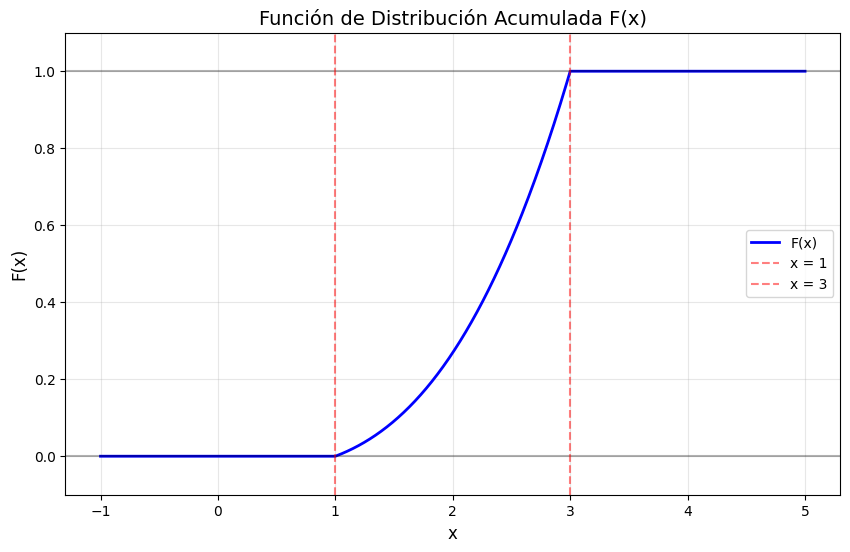

Valores específicos de F(x):
F(0) = 0
F(1) = 0.0
F(2) = 0.2692
F(3) = 1
F(4) = 1


In [3]:
# Graficamos la función de distribución acumulada F(X)
def calcular_F_x(valor_x):
    """Calcula F(x) para un valor dado de x"""
    if valor_x < 1:
        return 0
    elif valor_x >= 3:
        return 1
    else:
        # Para 1 ≤ x < 3: F(x) = (x³ - 1)/26
        return (valor_x**3 - 1) / 26

# Creamos valores para el gráfico
valores_x = np.linspace(-1, 5, 1000)
F_x = [calcular_F_x(xi) for xi in valores_x]

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(valores_x, F_x, 'b-', linewidth=2, label='F(x)')
plt.xlabel('x', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.title('Función de Distribución Acumulada F(x)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5, label='x = 1')
plt.axvline(x=3, color='r', linestyle='--', alpha=0.5, label='x = 3')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

# Calculamos algunos valores específicos
print('Valores específicos de F(x):')
print(f'F(0) = {calcular_F_x(0)}')
print(f'F(1) = {calcular_F_x(1)}')
print(f'F(2) = {calcular_F_x(2):.4f}')
print(f'F(3) = {calcular_F_x(3)}')
print(f'F(4) = {calcular_F_x(4)}')

### Ejercicios de Práctica

**1.** Verificar que F(x) es una función de distribución válida:
- F(x) es no decreciente ✓
- F(-∞) = 0 ✓  
- F(+∞) = 1 ✓
- F(x) es continua por la derecha ✓

**2.** Calcular algunas probabilidades usando F(x):
- P(X ≤ 2)
- P(1.5 < X ≤ 2.5)
- P(X > 2)

In [4]:
# Solución de los ejercicios de práctica
print('Ejercicio 2: Cálculo de probabilidades usando F(x)')
print('=' * 50)

# P(X ≤ 2)
prob_x_leq_2 = calcular_F_x(2)
display(Math(r'P(X \leq 2) = F(2) = \frac{2^3 - 1}{26} = \frac{8 - 1}{26} = \frac{7}{26} \approx ' + f'{prob_x_leq_2:.4f}'))
print('')

# P(1.5 < X ≤ 2.5) = F(2.5) - F(1.5)
f_2_5 = calcular_F_x(2.5)
f_1_5 = calcular_F_x(1.5)
prob_intervalo = f_2_5 - f_1_5
display(Math(r'P(1.5 < X \leq 2.5) = F(2.5) - F(1.5)'))
display(Math(r'= \frac{2.5^3 - 1}{26} - \frac{1.5^3 - 1}{26}'))
display(Math(r'= \frac{15.625 - 1}{26} - \frac{3.375 - 1}{26}'))
display(Math(r'= \frac{14.625}{26} - \frac{2.375}{26} = \frac{12.25}{26} \approx ' + f'{prob_intervalo:.4f}'))
print('')

# P(X > 2) = 1 - F(2)
prob_x_gt_2 = 1 - calcular_F_x(2)
display(Math(r'P(X > 2) = 1 - F(2) = 1 - \frac{7}{26} = \frac{19}{26} \approx ' + f'{prob_x_gt_2:.4f}'))

print('')
print('Resumen de resultados:')
print(f'P(X ≤ 2) = {prob_x_leq_2:.4f}')
print(f'P(1.5 < X ≤ 2.5) = {prob_intervalo:.4f}')
print(f'P(X > 2) = {prob_x_gt_2:.4f}')

Ejercicio 2: Cálculo de probabilidades usando F(x)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Resumen de resultados:
P(X ≤ 2) = 0.2692
P(1.5 < X ≤ 2.5) = 0.4712
P(X > 2) = 0.7308


---

## 📟 Cálculos con HP Prime

### Variables Aleatorias Continuas y Función de Distribución

La HP Prime puede ser una herramienta útil para **verificar** nuestros cálculos, especialmente para integrales y operaciones algebraicas. Aunque no tiene funciones específicas para distribuciones continuas personalizadas, podemos usar su capacidad de cálculo simbólico.

**💡 Modo recomendado:** Trabajar en vista **CAS** para obtener resultados exactos.

### 🔍 Paso 1: Verificar que f(x) es una función de densidad válida

**En HP Prime (modo CAS):**

```
# Definir la función de densidad
f(x) := (3/26)*x^2

# Verificar que la integral es 1
int(f(x), x, 1, 3)
```

**Resultado esperado:** `1` (confirma que es una función de densidad válida)

---

### 📊 Paso 2: Calcular la Función de Distribución F(x)

**En HP Prime (modo CAS):**

```
# Para 1 ≤ x ≤ 3, calcular F(x) = ∫[1 to x] f(t) dt
F(x) := int((3/26)*t^2, t, 1, x)

# Simplificar la expresión
simplify(F(x))
```

**Resultado esperado:** `(x³-1)/26`

**Para calcular valores específicos:**
```
# Ejemplos de evaluación
F(2)        # Resultado: 7/26 ≈ 0.2692
F(2.5)      # Resultado: (2.5³-1)/26 = 14.625/26
F(3)        # Resultado: 1
```

---

### 🎯 Paso 3: Calcular Probabilidades

**P(X ≤ 2) = F(2):**
```
F(2)
# o directamente:
(2^3-1)/26
```

**P(1.5 < X ≤ 2.5) = F(2.5) - F(1.5):**
```
F(2.5) - F(1.5)
# o paso a paso:
((2.5)^3-1)/26 - ((1.5)^3-1)/26
```

**P(X > 2) = 1 - F(2):**
```
1 - F(2)
# o directamente:
1 - (2^3-1)/26
```

---

### 💡 Consejos para HP Prime con Variables Continuas

**✅ Ventajas de usar HP Prime:**
- **Cálculo exacto** de integrales simbólicas
- **Verificación rápida** de resultados
- **Fracciones exactas** en lugar de decimales aproximados
- **Capacidad gráfica** para visualizar funciones

**🔧 Comandos útiles adicionales:**
```
# Convertir a decimal aproximado
approx(7/26)

# Trabajar con fracciones exactas
exact(0.2692)

# Resolver ecuaciones (por ejemplo, para encontrar percentiles)
solve(F(x) = 0.5, x)    # Para encontrar la mediana
```

**📚 Documentación adicional:**
- Ver `hp-prime/docs/Guia_HP_Prime_Probabilidad.md` en este repositorio
- Para más funciones estadísticas: menú `Toolbox → Math → Probability`

---

**🎓 Resumen:** La HP Prime es excelente para **verificar cálculos** y trabajar con **expresiones simbólicas exactas**, complementando perfectamente el trabajo conceptual y numérico realizado en Python.

## Ejercicio 6
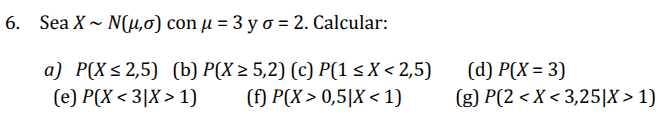